# Functional Connectivity Lab: Brain-Behavior Relationships

## GROUP A: EXPLORATORY ANALYSIS

## Learning Objectives

By the end of this lab, you will be able to:
- Conduct a functional connectivity analysis on real neuroimaging data
- Identify brain regions that predict cognitive performance
- Practice statistical analysis of brain-behavior relationships
- Visualize and interpret functional connectivity patterns
- Present your findings to the class

## Background

You have resting-state fMRI data from 200 subjects. For each subject, we have:

- **Functional connectivity values** for 400 pairs of brain regions ("edges")
  - Functional connectivity measures how correlated the BOLD signal is between two brain regions
  - Higher connectivity suggests the regions work together
  
- **Cognitive performance score** measuring executive function
  - Higher scores indicate better cognitive performance
  - Scores are z-scored (mean=0, SD=1)

- **Demographic and behavioral measures**
  - Age, Sex, BMI, IQ
  - Personality traits (Impulsivity, Conscientiousness, etc.)
  - Mental health measures (Anxiety, Depression, Stress)
  - Lifestyle factors (Sleep Quality, Physical Activity, etc.)
  - ...and many more!

### Brain Regions (ROIs)

The 400 connectivity edges involve three major brain networks:
- **ROI_0 through ROI_9**: Fronto-Parietal Network (FPN) - involved in cognitive control
- **ROI_10 through ROI_19**: Limbic System - involved in emotion and motivation
- **ROI_20 and above**: Visual and other regions

## Dataset Structure

You have two datasets:

1. **discovery_set.csv**: 200 subjects - Use this for finding relationships
2. **validation_set.csv**: Independent sample of 200 subjects - Use this later to confirm your findings

Each dataset contains:
- 400 columns named `ROI_X_NetworkName` (functional connectivity values)
- 1 column `Cognitive_Score` (your outcome variable)
- ~25 columns with demographic and behavioral variables

## Your Task: Find Significant Brain-Behavior Relationships!

Your goal is to **discover which brain connectivity patterns predict cognitive performance**.

### Extra Credit Opportunity! 🏆

**The team that finds the strongest, most significant brain-behavior relationships will receive extra credit.**

Be creative and thorough! You have many variables and analytical strategies at your disposal. Strong findings are:
- Statistically significant (p < 0.05 or better)
- Large effect sizes (higher correlations)
- Well-visualized and clearly presented

### Suggested Workflow

1. **Load and explore the data**
   - What does the data look like?
   - What are the variable distributions?

2. **Test relationships**
   - Which brain regions correlate with Cognitive_Score?
   - How strong are these relationships?

3. **Consider confounds**
   - Should you control for age, sex, or other variables?
   - How does this affect your results?

4. **Identify your strongest findings**
   - Rank your discoveries
   - Focus on the most impressive results

5. **Create visualizations**
   - Scatter plots showing relationships
   - Summary statistics tables

6. **Prepare your presentation**
   - What are your top 3-5 discoveries?
   - Why are they important?
   - What do they tell us about brain-cognition relationships?

You will present your findings to the class next session.

---

## Part 1: Load and Explore the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the discovery dataset
discovery = pd.read_csv("/Users/cmahlen/discovery_set.csv")

print(f"Dataset loaded successfully!")
print(f"Shape: {discovery.shape}")
print(f"\nColumns: {discovery.shape[1]} total")
print(f"Rows (subjects): {discovery.shape[0]}")

Dataset loaded successfully!
Shape: (200, 557)

Columns: 557 total
Rows (subjects): 200


In [3]:
# Take a look at the first few rows
discovery.head()

,ROI_0_FPN,ROI_1_FPN,ROI_2_FPN,ROI_3_FPN,ROI_4_FPN,ROI_5_FPN,ROI_6_FPN,ROI_7_FPN,ROI_8_FPN,ROI_9_FPN,ROI_10_Limbic,ROI_11_Limbic,ROI_12_Limbic,ROI_13_Limbic,ROI_14_Limbic,ROI_15_Limbic,ROI_16_Limbic,ROI_17_Limbic,ROI_18_Limbic,ROI_19_Limbic,ROI_20_Visual,ROI_21_Visual,ROI_22_Visual,ROI_23_Visual,ROI_24_Visual,...,behavior_75,behavior_76,behavior_77,behavior_78,behavior_79,behavior_80,behavior_81,behavior_82,behavior_83,behavior_84,behavior_85,behavior_86,behavior_87,behavior_88,behavior_89,behavior_90,behavior_91,behavior_92,behavior_93,behavior_94,behavior_95,behavior_96,behavior_97,behavior_98,behavior_99
0,-0.712,0.754,-0.045,0.452,1.345,1.038,1.350,0.861,1.479,-1.045,-0.789,-1.262,0.563,-0.243,0.914,-0.408,0.127,2.150,0.606,-0.027,-0.984,1.191,0.953,-1.087,-0.145,...,108.442,99.739,103.174,94.009,91.818,108.386,104.485,86.028,101.846,110.600,104.500,106.134,114.328,96.734,104.890,101.778,95.824,103.103,105.364,100.362,105.060,95.349,103.005,104.584,92.184
1,0.455,-1.221,-0.565,0.706,0.005,0.980,0.556,0.267,-1.032,-0.636,0.200,-0.197,-0.265,-0.536,-2.694,-0.533,0.308,-0.138,-1.800,-0.420,-0.029,-0.232,-0.117,-2.236,0.583,...,83.200,106.440,90.088,85.511,102.556,98.697,98.833,100.079,95.764,105.573,101.678,99.554,102.099,104.169,98.564,93.805,101.893,121.910,97.456,125.018,95.408,105.636,106.841,97.779,83.635
2,0.572,-1.226,-1.625,1.155,-0.340,-0.464,-0.544,-0.777,-1.508,-0.275,0.225,-1.531,1.008,-0.869,0.246,0.861,0.822,1.442,-1.795,-2.046,-1.644,-0.656,0.373,-1.229,-1.151,...,116.236,106.480,109.575,97.533,89.739,102.108,116.507,89.534,98.138,102.136,113.864,101.511,86.677,103.104,100.881,112.728,107.787,113.557,101.112,99.057,116.612,108.258,117.301,95.430,89.336
3,-1.022,-0.343,1.272,0.435,-0.854,0.236,2.465,0.890,1.238,-0.403,-0.134,2.098,-0.310,0.500,0.898,-0.055,-0.111,0.995,-0.376,-1.046,0.493,0.112,-0.475,0.004,-1.219,...,106.558,98.892,94.016,98.235,98.263,113.952,107.976,86.050,98.870,97.022,93.493,111.502,100.141,111.098,84.679,87.804,107.812,84.010,94.960,100.295,91.359,97.764,68.659,85.262,105.498
4,-0.200,0.801,1.666,0.201,0.407,0.796,0.175,0.435,-0.601,0.652,-1.166,1.684,-1.370,1.013,-0.864,0.627,1.445,-1.651,-0.082,0.043,-1.283,-0.569,1.236,-1.191,-0.417,...,118.943,108.862,114.931,95.327,104.469,117.369,92.726,89.958,100.042,94.553,97.456,114.682,90.831,115.988,101.159,97.891,89.375,115.597,92.446,100.475,110.010,86.120,126.467,101.369,79.274


In [4]:
# Get information about the dataset
discovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 557 entries, ROI_0_FPN to behavior_99
dtypes: float64(553), int64(4)
memory usage: 870.4 KB


In [5]:
# Separate ROI columns from other variables
roi_columns = [col for col in discovery.columns if col.startswith('ROI_')]
behavior_columns = [col for col in discovery.columns if col.startswith('behavior_')]
other_columns = [col for col in discovery.columns if col not in roi_columns and col not in behavior_columns]

print(f"ROI (brain connectivity) columns: {len(roi_columns)}")
print(f"Behavioral variable columns: {len(behavior_columns)}")
print(f"Other columns: {len(other_columns)}")
print(f"\nOther columns include: {other_columns}")

ROI (brain connectivity) columns: 435
Behavioral variable columns: 100
Other columns: 22

Other columns include: ['Cognitive_Score', 'Age', 'Sex', 'BMI', 'IQ', 'Physical_Activity_Level', 'Resting_HR', 'HRV', 'Impulsivity', 'Risk_Aversion', 'Conscientiousness', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Sleep_Quality', 'Fatigue', 'Motivation', 'Education_Years', 'Working_Memory_Span', 'Caffeine_Use', 'Handedness', 'SES_Index']


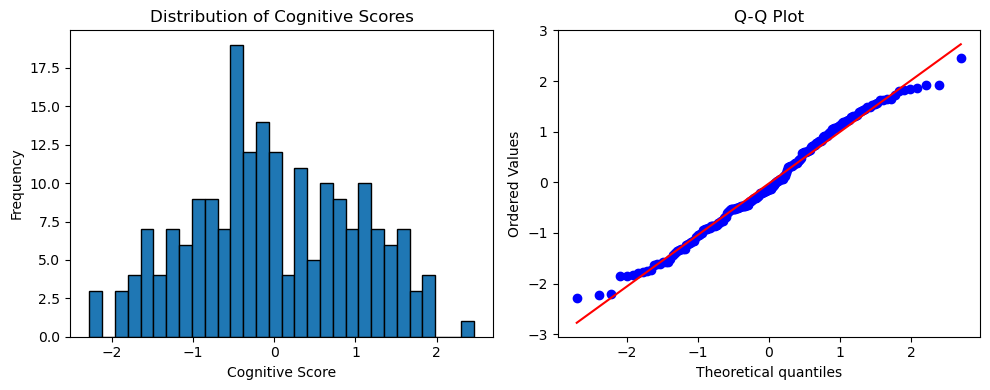

Cognitive Score - Mean: -0.023, SD: 1.015


In [6]:
# Explore the Cognitive_Score distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(discovery['Cognitive_Score'], bins=30, edgecolor='black')
plt.xlabel('Cognitive Score')
plt.ylabel('Frequency')
plt.title('Distribution of Cognitive Scores')

plt.subplot(1, 2, 2)
stats.probplot(discovery['Cognitive_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

print(f"Cognitive Score - Mean: {discovery['Cognitive_Score'].mean():.3f}, SD: {discovery['Cognitive_Score'].std():.3f}")

---

## Part 2: Task 1 - Exploratory Analysis

### Find which brain connectivity patterns correlate with cognitive performance!

**Your goal**: Test the relationship between each ROI and Cognitive_Score, then identify significant findings.

### Helper Function: Computing Correlations and P-values

We've provided a function to help you compute correlations and p-values efficiently.

In [7]:
def compute_brain_behavior_correlations(dataframe, outcome='Cognitive_Score'):
    """
    Compute correlations between all ROI columns and the outcome variable.
    
    Parameters:
    -----------
    dataframe : pandas DataFrame
        The dataset containing ROI columns and outcome
    outcome : str
        Name of the outcome column (default: 'Cognitive_Score')
    
    Returns:
    --------
    results_df : pandas DataFrame
        DataFrame with columns: ROI, r_value, p_value, sorted by p_value
    """
    roi_cols = [col for col in dataframe.columns if col.startswith('ROI_')]
    
    results = []
    for roi in roi_cols:
        r, p = pearsonr(dataframe[roi], dataframe[outcome])
        results.append({'ROI': roi, 'r_value': r, 'p_value': p})
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('p_value')
    results_df = results_df.reset_index(drop=True)
    
    return results_df

print("Helper function loaded!")

Helper function loaded!


In [8]:
compute_brain_behavior_correlations(discovery, outcome="Physical_Activity_Level")

,ROI,r_value,p_value
0,ROI_129_Visual,-2.181e-01,0.002
1,ROI_326_Visual,-2.055e-01,0.004
2,ROI_34_Visual,1.838e-01,0.009
3,ROI_235_Visual,1.834e-01,0.009
4,ROI_192_Visual,-1.653e-01,0.019
...,...,...,...
430,ROI_336_Visual,7.341e-04,0.992
431,ROI_397_Visual,-4.233e-04,0.995
432,ROI_296_Visual,3.217e-04,0.996
433,ROI_122_Visual,-2.815e-04,0.997


In [10]:
# Compute correlations between all ROIs and Cognitive_Score
results = compute_brain_behavior_correlations(discovery)

print("Correlation analysis complete!")
print(f"\nAnalyzed {len(results)} brain connectivity edges")
print(f"\nTop 10 findings (sorted by p-value):")
results.head(20)

Correlation analysis complete!

Analyzed 435 brain connectivity edges

Top 10 findings (sorted by p-value):


,ROI,r_value,p_value
0,ROI_15_Limbic,0.503,3.042e-14
1,ROI_5_FPN,0.303,1.321e-05
2,ROI_379_Visual,0.196,5.406e-03
3,ROI_1_FPN,0.186,8.518e-03
4,ROI_88_Visual,0.176,1.259e-02
5,ROI_293_Visual,0.175,1.295e-02
6,ROI_259_Visual,-0.175,1.330e-02
7,ROI_87_Visual,-0.170,1.604e-02
8,ROI_51_Visual,0.152,3.170e-02
9,ROI_288_Visual,0.152,3.223e-02


In [11]:
# How many findings are "significant" at p < 0.05?
n_significant = (results['p_value'] < 0.05).sum()
print(f"Number of 'significant' findings at p < 0.05: {n_significant}")
print(f"That's {n_significant/len(results)*100:.1f}% of all tested edges")

Number of 'significant' findings at p < 0.05: 15
That's 3.4% of all tested edges


In [12]:
# Extract significant findings
significant_findings = results[results['p_value'] < 0.05].copy()
print(f"\nAll significant findings (p < 0.05):")
significant_findings


All significant findings (p < 0.05):


,ROI,r_value,p_value
0,ROI_15_Limbic,0.503,3.042e-14
1,ROI_5_FPN,0.303,1.321e-05
2,ROI_379_Visual,0.196,5.406e-03
3,ROI_1_FPN,0.186,8.518e-03
4,ROI_88_Visual,0.176,1.259e-02
5,ROI_293_Visual,0.175,1.295e-02
6,ROI_259_Visual,-0.175,1.330e-02
7,ROI_87_Visual,-0.170,1.604e-02
8,ROI_51_Visual,0.152,3.170e-02
9,ROI_288_Visual,0.152,3.223e-02


---

## Part 3: Task 2 - Visualize Your Top Findings

Create scatter plots showing the relationship between your top brain regions and cognitive score.

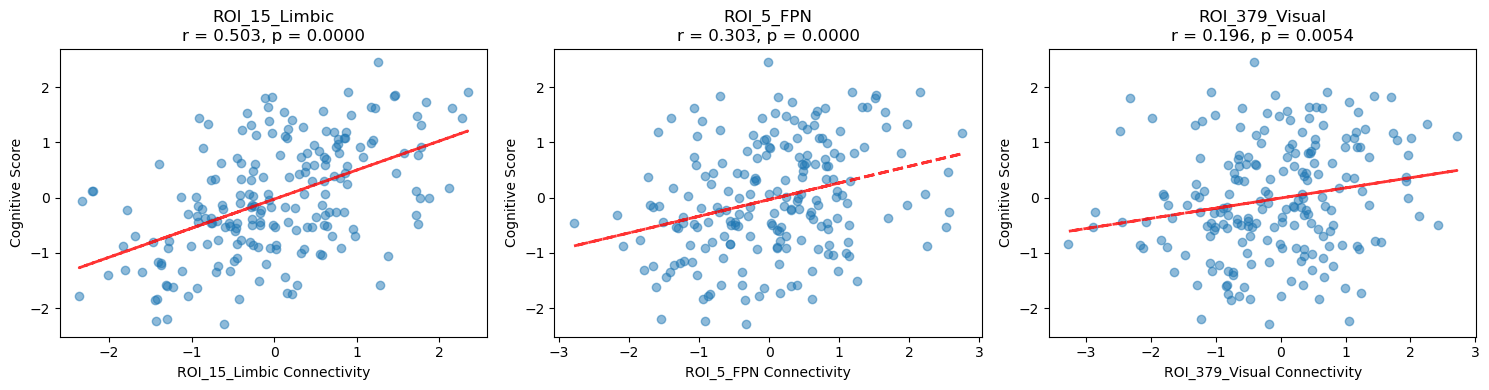

In [13]:
# Get the top 3 findings
top_3 = results.head(3)

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (_, row) in enumerate(top_3.iterrows()):
    roi = row['ROI']
    r = row['r_value']
    p = row['p_value']
    
    axes[idx].scatter(discovery[roi], discovery['Cognitive_Score'], alpha=0.5)
    axes[idx].set_xlabel(f'{roi} Connectivity')
    axes[idx].set_ylabel('Cognitive Score')
    axes[idx].set_title(f'{roi}\nr = {r:.3f}, p = {p:.4f}')
    
    # Add regression line
    z = np.polyfit(discovery[roi], discovery['Cognitive_Score'], 1)
    p_line = np.poly1d(z)
    axes[idx].plot(discovery[roi], p_line(discovery[roi]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

---

## Part 4: Task 3 - Statistical Summary

Create a summary of your findings to present.

In [14]:
# Summary statistics for your presentation
print("="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print(f"\nTotal brain regions tested: {len(results)}")
print(f"Significant findings (p < 0.05): {n_significant}")
print(f"\nStrongest correlation: r = {results.iloc[0]['r_value']:.3f}")
print(f"Most significant p-value: p = {results.iloc[0]['p_value']:.6f}")
print(f"\nTop 5 Brain Regions Predicting Cognitive Performance:")
print("="*80)
top_5_display = results.head(5)[['ROI', 'r_value', 'p_value']].copy()
top_5_display.index = range(1, 6)
print(top_5_display.to_string())

SUMMARY OF FINDINGS

Total brain regions tested: 435
Significant findings (p < 0.05): 15

Strongest correlation: r = 0.503
Most significant p-value: p = 0.000000

Top 5 Brain Regions Predicting Cognitive Performance:
              ROI  r_value    p_value
1   ROI_15_Limbic    0.503  3.042e-14
2       ROI_5_FPN    0.303  1.321e-05
3  ROI_379_Visual    0.196  5.406e-03
4       ROI_1_FPN    0.186  8.518e-03
5   ROI_88_Visual    0.176  1.259e-02


---

## Part 5: Optional - Further Exploration

### Should you control for confounds?

Perhaps age, sex, or other variables affect both brain connectivity and cognitive performance. You might want to control for these "confounding" variables to see if your findings hold up.

Below are some examples showing how controlling for different variables affects your results.

### Demonstration: How Covariate Selection Affects Results

Let's see how adding covariates changes the significance of your findings.

In [71]:
from sklearn.linear_model import LinearRegression

# Let's examine your top finding and see how covariates affect it
top_roi = results.iloc[0]['ROI']

print(f"Examining: {top_roi}")
print("="*80)

# 1. No covariates (what you already computed)
r_no_cov, p_no_cov = pearsonr(discovery[top_roi], discovery['Cognitive_Score'])
print(f"\n1. NO covariates:")
print(f"   r = {r_no_cov:.3f}, p = {p_no_cov:.6f}")

# 2. Control for Age and Sex
model = LinearRegression()
X = discovery[['Age', 'Sex']]
model.fit(X, discovery[top_roi])
roi_resid = discovery[top_roi] - model.predict(X)
r_2cov, p_2cov = pearsonr(roi_resid, discovery['Cognitive_Score'])
print(f"\n2. Controlling for Age, Sex:")
print(f"   r = {r_2cov:.3f}, p = {p_2cov:.6f}")

# 3. Control for Age, Sex, IQ, Sleep_Quality, Anxiety_Score
X_full = discovery[['Age', 'Sex', 'IQ', 'Sleep_Quality', 'Anxiety_Score']]
model.fit(X_full, discovery[top_roi])
roi_resid_full = discovery[top_roi] - model.predict(X_full)
r_5cov, p_5cov = pearsonr(roi_resid_full, discovery['Cognitive_Score'])
print(f"\n3. Controlling for Age, Sex, IQ, Sleep_Quality, Anxiety_Score:")
print(f"   r = {r_5cov:.3f}, p = {p_5cov:.6f}")

print(f"\n" + "="*80)
print(f"OBSERVATION: P-value changed from {p_no_cov:.6f} to {p_5cov:.6f}")
print(f"This is a {abs(p_5cov - p_no_cov)/p_no_cov * 100:.1f}% change!")
print("="*80)
print("\nNotice how adding different covariates can make findings more or less significant.")
print("Question: Which covariates should you include? All of them? None? Some subset?")
print("If you choose AFTER seeing results, that can be problematic...")

Examining: ROI_15_Limbic

1. NO covariates:
   r = 0.489, p = 0.000000

2. Controlling for Age, Sex:
   r = 0.488, p = 0.000000

3. Controlling for Age, Sex, IQ, Sleep_Quality, Anxiety_Score:
   r = 0.483, p = 0.000000

OBSERVATION: P-value changed from 0.000000 to 0.000000
This is a 112.5% change!

Notice how adding different covariates can make findings more or less significant.
Question: Which covariates should you include? All of them? None? Some subset?
If you choose AFTER seeing results, that can be problematic...


### Demonstration: Threshold Selection

The threshold you choose (p < 0.05? p < 0.01?) dramatically affects your "findings".

How many 'significant' findings at different thresholds?
p < 0.0500:  26 significant edges (  6.0%)
p < 0.0100:   6 significant edges (  1.4%)
p < 0.0010:   3 significant edges (  0.7%)
p < 0.0001:   1 significant edges (  0.2%)


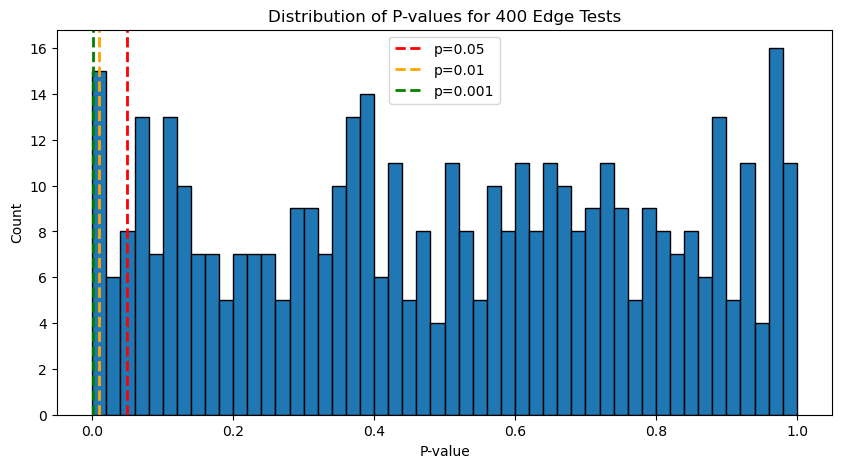


The threshold you choose dramatically affects how many 'findings' you report.
Choosing the threshold AFTER seeing results is problematic!


In [72]:
# Count findings at different thresholds
thresholds = [0.05, 0.01, 0.001, 0.0001]

print("How many 'significant' findings at different thresholds?")
print("="*80)
for thresh in thresholds:
    n_sig = (results['p_value'] < thresh).sum()
    print(f"p < {thresh:6.4f}: {n_sig:3d} significant edges ({n_sig/len(results)*100:5.1f}%)")

# Visualize p-value distribution
plt.figure(figsize=(10, 5))
plt.hist(results['p_value'], bins=50, edgecolor='black')
plt.axvline(0.05, color='r', linestyle='--', linewidth=2, label='p=0.05')
plt.axvline(0.01, color='orange', linestyle='--', linewidth=2, label='p=0.01')
plt.axvline(0.001, color='green', linestyle='--', linewidth=2, label='p=0.001')
plt.xlabel('P-value')
plt.ylabel('Count')
plt.title('Distribution of P-values for 400 Edge Tests')
plt.legend()
plt.show()

print("\nThe threshold you choose dramatically affects how many 'findings' you report.")
print("Choosing the threshold AFTER seeing results is problematic!")

### Demonstration: Multiple Comparisons Reality Check

When you test many hypotheses, some will be "significant" by chance alone!

In [73]:
# The multiple comparisons problem
n_tests = len(results)
alpha = 0.05
expected_false_positives = n_tests * alpha

print("="*80)
print("THE MULTIPLE COMPARISONS PROBLEM")
print("="*80)
print(f"\nYou tested {n_tests} edges at p < {alpha}")
print(f"\nExpected FALSE POSITIVES by chance alone: {expected_false_positives:.0f}")
print(f"Actual 'significant' findings you found: {n_significant}")

# What would Bonferroni correction require?
bonferroni_threshold = alpha / n_tests
n_bonf = (results['p_value'] < bonferroni_threshold).sum()

print(f"\n" + "="*80)
print(f"BONFERRONI CORRECTION")
print(f"="*80)
print(f"Bonferroni-corrected threshold: p < {bonferroni_threshold:.6f}")
print(f"Findings surviving Bonferroni correction: {n_bonf}")

if n_bonf < n_significant:
    print(f"\nYou lost {n_significant - n_bonf} of your {n_significant} findings!")
    print(f"This demonstrates why multiple comparison correction matters.")

THE MULTIPLE COMPARISONS PROBLEM

You tested 435 edges at p < 0.05

Expected FALSE POSITIVES by chance alone: 22
Actual 'significant' findings you found: 26

BONFERRONI CORRECTION
Bonferroni-corrected threshold: p < 0.000115
Findings surviving Bonferroni correction: 1

You lost 25 of your 26 findings!
This demonstrates why multiple comparison correction matters.


### Demonstration: False Discovery Rate (FDR) Correction

FDR is less conservative than Bonferroni. Let's see what happens.

In [74]:
from statsmodels.stats.multitest import multipletests

# Apply FDR correction
rejected, p_corrected, _, _ = multipletests(results['p_value'], method='fdr_bh')

results_corrected = results.copy()
results_corrected['p_fdr'] = p_corrected
results_corrected['significant_fdr'] = rejected

n_fdr = rejected.sum()

print("="*80)
print("FALSE DISCOVERY RATE (FDR) CORRECTION")
print("="*80)
print(f"Findings surviving FDR correction: {n_fdr}")
print(f"\nComparison:")
print(f"  Uncorrected (p < 0.05):     {n_significant} findings")
print(f"  FDR corrected:              {n_fdr} findings")
print(f"  Bonferroni corrected:       {n_bonf} findings")

if n_fdr > 0:
    print(f"\nFindings surviving FDR correction:")
    print(results_corrected[results_corrected['significant_fdr']][['ROI', 'r_value', 'p_value', 'p_fdr']])

FALSE DISCOVERY RATE (FDR) CORRECTION
Findings surviving FDR correction: 2

Comparison:
  Uncorrected (p < 0.05):     26 findings
  FDR corrected:              2 findings
  Bonferroni corrected:       1 findings

Findings surviving FDR correction:
              ROI  r_value    p_value      p_fdr
0   ROI_15_Limbic    0.489  2.062e-13  8.969e-11
1  ROI_413_Visual    0.259  2.121e-04  4.612e-02


### Demonstration: Outlier Handling

Removing outliers can flip a finding from significant to non-significant (or vice versa). This is fine if your criteria were pre-specified, but problematic if you decided to remove outliers *after* seeing the results.

In [ ]:
# Outlier handling: pick a marginal finding to demonstrate the effect
# Find a finding with p close to 0.05
marginal = results[(results['p_value'] > 0.02) & (results['p_value'] < 0.08)].iloc[0]
marginal_roi = marginal['ROI']

# All data
r_all, p_all = stats.pearsonr(discovery[marginal_roi], discovery['Cognitive_Score'])

# Remove outliers (±3 SD on the ROI)
z_scores = np.abs((discovery[marginal_roi] - discovery[marginal_roi].mean()) / discovery[marginal_roi].std())
mask_3sd = z_scores < 3
disc_clean_3sd = discovery[mask_3sd]
r_3sd, p_3sd = stats.pearsonr(disc_clean_3sd[marginal_roi], disc_clean_3sd['Cognitive_Score'])

# Remove outliers (±2 SD — more aggressive)
mask_2sd = z_scores < 2
disc_clean_2sd = discovery[mask_2sd]
r_2sd, p_2sd = stats.pearsonr(disc_clean_2sd[marginal_roi], disc_clean_2sd['Cognitive_Score'])

print(f"Outlier handling for a marginal finding: {marginal_roi}")
print(f"  All data (n={len(discovery)}):         r={r_all:.4f}, p={p_all:.6f}")
print(f"  ±3 SD removed (n={mask_3sd.sum()}):  r={r_3sd:.4f}, p={p_3sd:.6f}")
print(f"  ±2 SD removed (n={mask_2sd.sum()}):  r={r_2sd:.4f}, p={p_2sd:.6f}")

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(discovery[mask_2sd][marginal_roi], discovery[mask_2sd]['Cognitive_Score'],
            alpha=0.4, label='Kept (±2 SD)')
outside_2sd = ~mask_2sd & mask_3sd
plt.scatter(discovery[outside_2sd][marginal_roi], discovery[outside_2sd]['Cognitive_Score'],
            color='orange', s=80, marker='s', label='Removed at ±2 SD only')
plt.scatter(discovery[~mask_3sd][marginal_roi], discovery[~mask_3sd]['Cognitive_Score'],
            color='red', s=100, marker='x', label='Removed at ±3 SD')
plt.xlabel(f'{marginal_roi} Connectivity')
plt.ylabel('Cognitive Score')
plt.title(f'Outlier Removal: {marginal_roi}')
plt.legend()
plt.tight_layout()
plt.show()

print("\nNotice: different outlier thresholds give different p-values.")
print("Deciding to remove outliers AFTER seeing results is a form of p-hacking!")

### Demonstration: Subgroup Analysis

Effects can appear significant in subgroups even when not significant overall (or vice versa). Testing many subgroups without pre-specifying them inflates your false positive rate.

In [ ]:
# Subgroup analysis: split by median Age
# Pick a ROI that shows a borderline effect
test_roi = results.iloc[2]['ROI']  # third-ranked ROI

median_age = discovery['Age'].median()
young = discovery[discovery['Age'] < median_age]
old = discovery[discovery['Age'] >= median_age]

r_all, p_all = stats.pearsonr(discovery[test_roi], discovery['Cognitive_Score'])
r_young, p_young = stats.pearsonr(young[test_roi], young['Cognitive_Score'])
r_old, p_old = stats.pearsonr(old[test_roi], old['Cognitive_Score'])

print(f"Subgroup analysis for {test_roi}:")
print(f"  All subjects (n={len(discovery)}):   r={r_all:.4f}, p={p_all:.6f}")
print(f"  Younger half (n={len(young)}):  r={r_young:.4f}, p={p_young:.6f}")
print(f"  Older half   (n={len(old)}):  r={r_old:.4f}, p={p_old:.6f}")

# You could also split by Sex
male = discovery[discovery['Sex'] == 1] if 'Sex' in discovery.columns else None
female = discovery[discovery['Sex'] == 0] if 'Sex' in discovery.columns else None

if male is not None and female is not None and len(male) > 10 and len(female) > 10:
    r_m, p_m = stats.pearsonr(male[test_roi], male['Cognitive_Score'])
    r_f, p_f = stats.pearsonr(female[test_roi], female['Cognitive_Score'])
    print(f"\n  Male   (n={len(male)}):  r={r_m:.4f}, p={p_m:.6f}")
    print(f"  Female (n={len(female)}):  r={r_f:.4f}, p={p_f:.6f}")

print(f"\nWith 2 subgroup splits × {len(results)} ROIs, you could run")
print(f"{2 * len(results)} = {2 * len(results)} additional tests.")
print("Each split halves your sample size and reduces power.")
print("Pre-specify subgroup analyses to avoid inflating false positives!")

---

## Part 6: Your Workspace

Use the cells below to explore further, refine your analyses, or try different approaches.

Some ideas:
- Try controlling for different covariates
- Look at subgroups (e.g., males vs females, younger vs older)
- Explore relationships with other behavioral measures
- Create better visualizations for your presentation

In [ ]:
# Your exploration here


In [ ]:
# Your exploration here


In [ ]:
# Your exploration here


---

## Part 7: IMPORTANT - Validation Testing

### Do your discoveries replicate?

Now that you've identified your top findings in the discovery set, let's test whether they hold up in the **independent validation set**.

This is a critical step in research! If findings don't replicate in new data, they may have been false positives.

In [75]:
# Load the validation dataset
validation = pd.read_csv("/Users/cmahlen/validation_set.csv")

print(f"Validation dataset loaded!")
print(f"Shape: {validation.shape}")
print(f"\nThis is a completely independent sample of {validation.shape[0]} subjects.")

Validation dataset loaded!
Shape: (200, 557)

This is a completely independent sample of 200 subjects.


In [76]:
# Test your top 5 discoveries in the validation set
top_5_rois = results.head(5)['ROI'].tolist()

print("="*80)
print("VALIDATION TESTING: Do your top discoveries replicate?")
print("="*80)

validation_results = []
for roi in top_5_rois:
    # Discovery set results
    disc_row = results[results['ROI'] == roi].iloc[0]
    r_disc = disc_row['r_value']
    p_disc = disc_row['p_value']
    
    # Validation set results
    r_val, p_val = pearsonr(validation[roi], validation['Cognitive_Score'])
    
    # Did it replicate? (p < 0.05 in validation)
    replicated = "YES" if p_val < 0.05 else "NO"
    
    validation_results.append({
        'ROI': roi,
        'Discovery_r': r_disc,
        'Discovery_p': p_disc,
        'Validation_r': r_val,
        'Validation_p': p_val,
        'Replicated': replicated
    })

validation_df = pd.DataFrame(validation_results)
validation_df.index = range(1, 6)
print("\n", validation_df.to_string())

# Summary
n_replicated = (validation_df['Replicated'] == 'YES').sum()
print(f"\n" + "="*80)
print(f"REPLICATION SUMMARY: {n_replicated} out of 5 top findings replicated")
print("="*80)

VALIDATION TESTING: Do your top discoveries replicate?

               ROI  Discovery_r  Discovery_p  Validation_r  Validation_p Replicated
1   ROI_15_Limbic        0.489    2.062e-13        -0.073         0.303         NO
2  ROI_413_Visual        0.259    2.121e-04         0.018         0.795         NO
3  ROI_160_Visual        0.237    7.113e-04         0.054         0.451         NO
4  ROI_359_Visual       -0.224    1.452e-03        -0.103         0.146         NO
5  ROI_262_Visual       -0.186    8.470e-03         0.029         0.683         NO

REPLICATION SUMMARY: 0 out of 5 top findings replicated


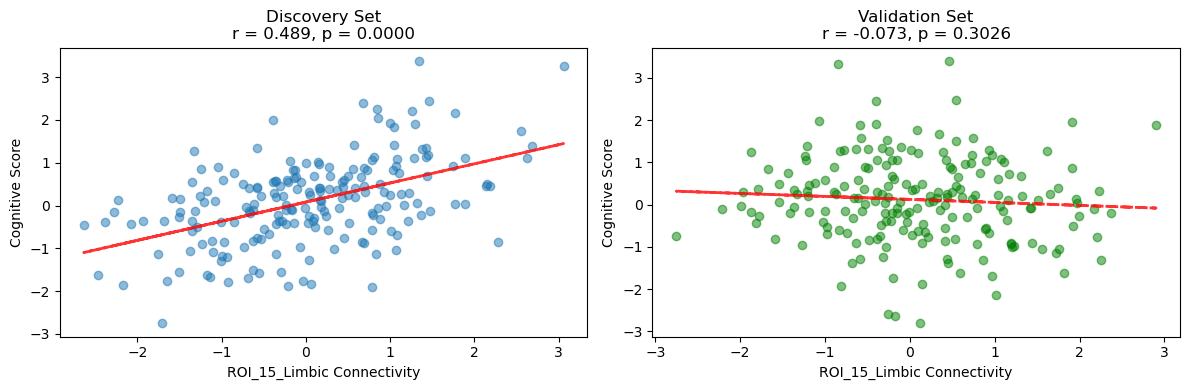


Your strongest finding: ROI_15_Limbic
Discovery:  r = 0.489, p = 0.000000
Validation: r = -0.073, p = 0.302623

This finding DID NOT replicate in the validation set.
This suggests it may have been a false positive.


In [77]:
# Visualize discovery vs validation for your top finding
top_roi = results.iloc[0]['ROI']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Discovery set
r_disc, p_disc = pearsonr(discovery[top_roi], discovery['Cognitive_Score'])
axes[0].scatter(discovery[top_roi], discovery['Cognitive_Score'], alpha=0.5)
axes[0].set_xlabel(f'{top_roi} Connectivity')
axes[0].set_ylabel('Cognitive Score')
axes[0].set_title(f'Discovery Set\nr = {r_disc:.3f}, p = {p_disc:.4f}')
z = np.polyfit(discovery[top_roi], discovery['Cognitive_Score'], 1)
p_line = np.poly1d(z)
axes[0].plot(discovery[top_roi], p_line(discovery[top_roi]), "r--", alpha=0.8, linewidth=2)

# Validation set
r_val, p_val = pearsonr(validation[top_roi], validation['Cognitive_Score'])
axes[1].scatter(validation[top_roi], validation['Cognitive_Score'], alpha=0.5, color='green')
axes[1].set_xlabel(f'{top_roi} Connectivity')
axes[1].set_ylabel('Cognitive Score')
axes[1].set_title(f'Validation Set\nr = {r_val:.3f}, p = {p_val:.4f}')
z = np.polyfit(validation[top_roi], validation['Cognitive_Score'], 1)
p_line = np.poly1d(z)
axes[1].plot(validation[top_roi], p_line(validation[top_roi]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

print(f"\nYour strongest finding: {top_roi}")
print(f"Discovery:  r = {r_disc:.3f}, p = {p_disc:.6f}")
print(f"Validation: r = {r_val:.3f}, p = {p_val:.6f}")
if p_val < 0.05:
    print("\nThis finding REPLICATED in the validation set!")
else:
    print("\nThis finding DID NOT replicate in the validation set.")
    print("This suggests it may have been a false positive.")

---

## Part 8: Reflection Questions

Before next class, think about these questions:

1. **Which of your discoveries replicated? Which didn't?**
   - What might explain why some replicated and others didn't?

2. **Effect sizes**
   - How did the correlation strength (r value) change from discovery to validation?
   - Were the validation effects generally weaker?

3. **Multiple comparisons**
   - You tested 400 brain regions. With p < 0.05, how many false positives would you expect by chance?
   - Did you correct for multiple comparisons? Why or why not?

4. **Analytic flexibility**
   - How many different analysis choices did you make (threshold, covariates, etc.)?
   - If you tried multiple approaches, which results did you choose to present?

5. **The extra credit incentive**
   - Did the extra credit incentive affect your analysis decisions?
   - Did you feel pressure to find "significant" results?

We'll discuss these questions next class!

---

## Part 9: Prepare Your Presentation

For next class, prepare a brief presentation (5-7 minutes) covering:

1. **Your approach**
   - What analyses did you run?
   - What decisions did you make (covariates, thresholds, etc.)?

2. **Your top findings**
   - 3-5 strongest brain-behavior relationships
   - Show visualizations
   - Report statistics (r values, p values)

3. **Validation results**
   - Did your findings replicate?
   - What does this mean?

4. **Interpretation**
   - What do your findings tell us about brain-cognition relationships?
   - Why are these findings important?

Save your best figures and create slides or a summary document!